<h1>Questions to be handed in for  <em>Taylor Polynomials</em></h1>

<p>We begin by loading  packagse for plotting, automatic differentiation, and symbolic manipulations:</p>

In [1]:
using Plots
using Roots
using ForwardDiff
D(f, k=1) = k > 1 ? D(D(f),k-1) : x -> ForwardDiff.derivative(f, float(x))
using QuadGK
using SymPy

<h3>Quick background</h3>

<p>A <strong>Taylor polynomial</strong> of a function $f(x)$ about $x=c$ of degree $n$ is formally defined by</p>


$$
T_n(x) = f(c) + \frac{f'(c)}{1!}(x-c)  \frac{f''(c)}{2!}(x-c)^2 + \cdots + \frac{f^{(n)}(c)}{n!}(x-c)^n.
$$


<p>When $n=1$ this is the familiar tangent line approximation. Higher orders, generally yield better approximations. </p>

<p>In <code>julia</code> we can create this series numerically using the <code>D</code> function. It is useful to write our function so that it returns a function, as is done with the following. We use a quadratic approximation for the default order and expand around $0$ as the default (the Maclaurin polynomial).</p>

In [1]:
function taylor(f, n=2; c::Real=0)
	 x -> f(c) + sum([D(f, k)(c)/factorial(k)*(x-c)^k for k in 1:n])
end

taylor (generic function with 2 methods)

<p>We can see graphically that the Taylor polynomial approximates the function $f(x)$ around the $x=c$. For example, we approximate $\cos(x)$ at $x=0$ and $x=1$:</p>

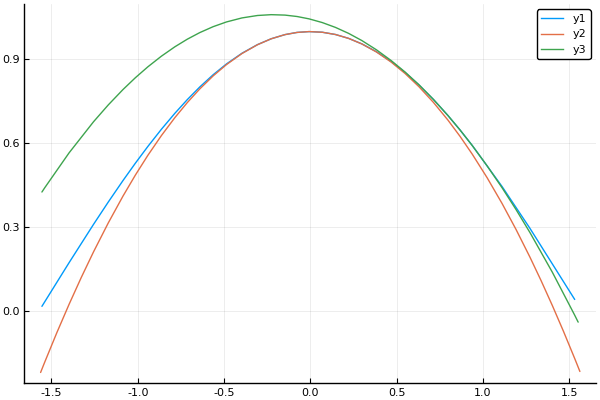

In [1]:
f(x) = cos(x)
plot([f, taylor(f, 2, c=0), taylor(f, 2, c=pi/4)], -pi/2, pi/2)

<p>We can see that taking higher orders can lead to better approximations. In the following we use a comprehension and <em>splatting</em> to avoid having to type <code>plot&#40;&#91;f, taylor&#40;f,1&#41;, taylor&#40;f,2&#41;, taylor&#40;f,3&#41;, ..., taylor&#40;f,6&#41; &#93;, 0, 4&#41;</code>:</p>

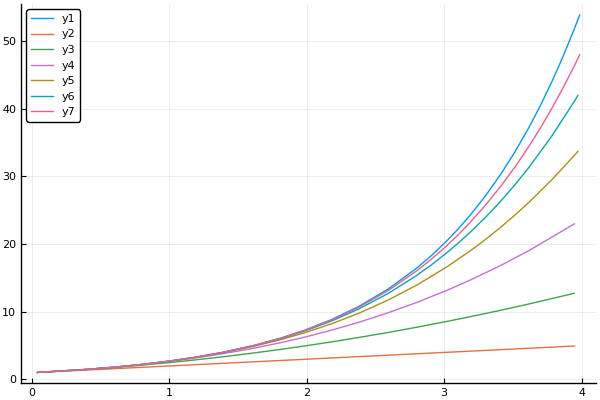

In [1]:
f(x) = exp(x)
fs = [f, [taylor(f,n) for n in 1:6]...]
plot(fs, 0, 4) # 6 polynomial approximations

<p>You should be able to confirm that the higher-order approximations do a better job.</p>

<p>Mathematically, the above picture is governed by the following <em>error bound</em> for Taylor polynomials:</p>


$$
| f(x) - T_n(x) | \leq | \frac{f^{(n+1)}(z^*)}{(n+1)!} \cdot (x-c)^{n+1} |
$$


<p>where $z^*$ is chosen to maximize the above expression between $x$ and $c$. That is, the largest possible value (in absolute value) for the next term in the Taylor polynomial provides a bound for the error. </p>

<hr />

<h3>Questions</h3>

<h4>Maclaurin Polynomials. <small>Useful approximations</small></h4>

<ul>
<li><p>Verify graphically that the approximation $\log(1 + x) \approx x$ comes from using the Maclaurin polynomial of degree 1. The approximation is not good for all $x$. What seems like a reasonable range of $x$ for where it is "good?"</p>
</li>
</ul>

<h4>Maclaurin Polynomials</h4>

<ul>
<li><p>Let $f(x) = \tan(x)$. Plot the first $6$ Maclaurin polynomials and $f$ over $[-\pi/3, \pi/3]$. Is the approximation good at $x=0$? Are any of the approximations good at $\pi/3$?</p>
</li>
</ul>

<h4>Maclaurin Polynomials <small>better for bigger $k$?</small></h4>

<ul>
<li><p>Let $f(x) = \sin(x)$. Plot the first $6$ Maclaurin polynomials and $f$ over $[-\pi/2, \pi/2]$.  Is the approximation good at $x=0$? Are any of the approximations good at $\pi/2$?</p>
</li>
</ul>

<h4>Is 4th better then 3rd?</h4>

<ul>
<li><p>Again for $f(x) = \sin(x)$. Plot the function and the Maclaurin polynomials of degree $3$ and $4$. Is the $4$th degree polynomial a better approximation? Why or why not?</p>
</li>
</ul>

<h4>Approximate integration by approximating the function – not the area.</h4>

<ul>
<li><p>The function $f(x) = e^{-x^2}$ does not have an antiderivative, hence can not be integrated by the fundamental theorem of calculus. One can estimate the integral using Riemann sums <em>or</em> one can estimate the function by an easily integrable function and integrate that. Of course, Maclaurin polynomials are easily integrable.</p>
<p>Plot several Maclaurin polynomials that approximate $f(x)$ over the interval $[0, 0.5]$. Choose the lowest order one that graphically matches over that interval. Integrate that approximation and compare to the value given by:</p>
</li>
</ul>

In [1]:
f(x) = exp(-x^2)
quadgk(f, 0, 0.5)

(0.46128100641279246, 0.0)

<h4>Verifying the error bound</h4>

<ul>
<li><p>Let $f(x) = e^x$ a monotone function. Let $T_3(x)$ be the 3rd-order Maclaurin polynomial. Verify graphically that over the interval $[0,4]$ the difference $|f(x) - T_3(x)| < f''''(4)/4! \cdot (x-0)^4$. (We know that for this function $f''''(4)$ is monotone increasing, so is largest at the right end point, hence the use of $f''''(4)$ in the bound.)</p>
<p>Is the bound a "tight" bound over the entire interval, in that the actual error is close to the given bound? (Check graphically.)</p>
</li>
</ul>

<h4>A physics application</h4>

<ul>
<li><p>The following two formulas come from different eras of physics:</p>
</li>
</ul>


$$
k_1(v) = \frac{1}{2}v^2, \quad k_2(v,c) =c^2((1-(v/c)^2)^{-1/2} - 1).
$$


<p>Which we can express via:</p>

In [1]:
k1(v) = v^2 / 2
k2(v; c=10) = c^2 * (1/sqrt(1 - (v/c)^2) - 1)

k2 (generic function with 1 method)

<p>Both describe the kinetic energy, but one uses Einstein's theory of relativity. For any value of $c > 0$, show that the two agree up to second order approximations by Maclaurin polynomials.</p>

<h4>A different motivation for the polynomials</h4>

<ul>
<li><p>Here is a different motivation of the Maclaurin polynomial that can be explored symbolically.  (This is a generalization of the tangent line, where the "polynomial" is the secant line, and the limiting values there combine to give the tangent line.)</p>
</li>
</ul>

<p>For concreteness let $f(x) = e^x$. For any $b > 0$, there is just one fifth degree polynomial, $p(x)$, satisfying $p(i\cdot b) = f(i\cdot b)$ for $i=0,1,2,3,4,5$. This is polynomial interpolation at 6 points.</p>

<p>This particular solution can be found as follows using <code>SymPy</code>:</p>

In [1]:
@vars a0 a1 a2 a3 a4 a5 b
f(x) = exp(x)
g(x) = a0 + a1*x + a2*x^(2//1) + a3*x^(3//1) + a4*x^(4//1) + a5*x^(5//1) - f(x)
di = solve(Sym[g(i*b) for i in 0:5], [a0, a1,a2,a3,a4,a5])

<p>At first glance, this seems to have nothing to do with the Maclaurin polynomial for $f(x)$, $T_5(x) = 1 + x + x^2/2 + x^3/6 + x^4/24 + x^5/120$. But wait, let's take the limit as $b$ goes to zero of each value in <code>di</code>. For example, the fifth term:</p>

In [1]:
limit(di[a5], b, 0)

<p>The answer is the <code>a5</code> coefficient of $T_5(x)$. Verify that this is the case for each of <code>a0</code>, ..., <code>a4</code>.</p>

<p><script> // f(x) = sin(x) // x, b = @syms x b // n = 10</p>

<p>// bs = b*[0:n]</p>

<p>// A = hcat(ones(Sym, n+1), [bs.^(i//1) for i in 1:n]... )</p>

<p>// Ai = inverse(A) ## NOT inv(A)!!! // fs = Sym[subs(f(x),x,i*b) for i in 0:n]</p>

<p>// [limit((Ai * fs)[i], b, 0) for i in 1:n+1] </script></p>